 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.¶ A - результаты для выборки людей получающих препарат А. B - результаты для другой выборки людей, получающих препарат B.

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import f_oneway
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

In [3]:
alpha = 0.05   # Уровень значимости

In [4]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

In [6]:
stat2, p2 = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat2, p2))

if p2 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1930.000, p=0.041
Different distribution (reject H0)


Следовательно есть различие в эффекте у пациентов

1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов. А - те же люди, но без препарата. B - выборка получающая препарат B

In [8]:
np.random.seed(11)
A1 = stats.norm.rvs(scale=30,loc=11,size=100)
B1 = A + stats.norm.rvs(scale=54,loc=11,size=100)

stat, p1 = mannwhitneyu(A1, B1)
print('Statistics=%.3f, p=%.3f' % (stat, p1))

if p1 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (отвергнуть H0)')

Statistics=4343.000, p=0.054
Same distribution (fail to reject H0)


Следовательно нет эффекта

1. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой?

In [9]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [10]:
F, p = f_oneway(water, nutri, mineral)
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0)


следовательно можно сделать вывод, что есть эффект от минералки


###Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:




По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

##Данные A/B тестирования

In [4]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?
retention_7 - проигрыватель вернулся и играл через 7 дней после установки?
Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`

In [5]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


#Ваши выводы

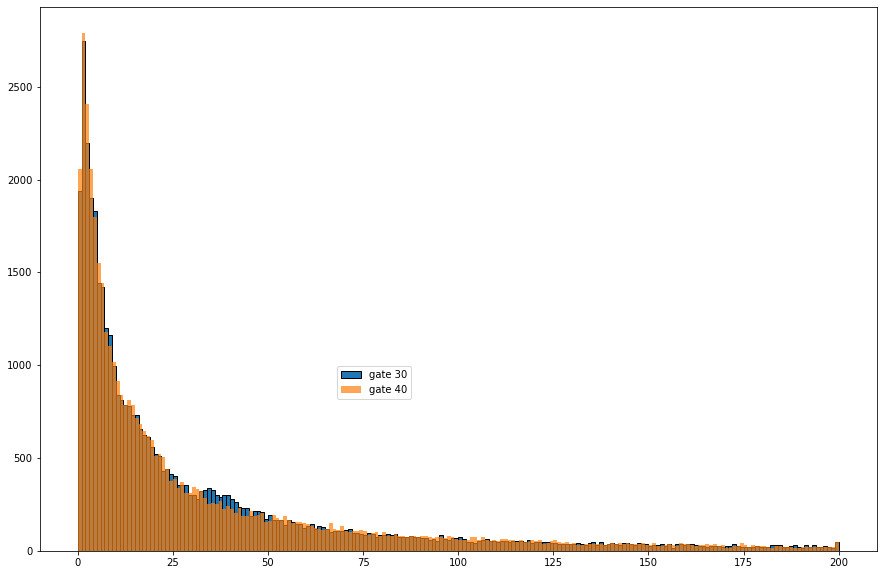

In [7]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Мы видим, что после некоторого количества раундов количество игроков стремительно снижается, после начинает снижаться постепенно. Предположу, что резкий спад происходит как раз у "ворот"

Text(0.5, 0, '# Game rounds')

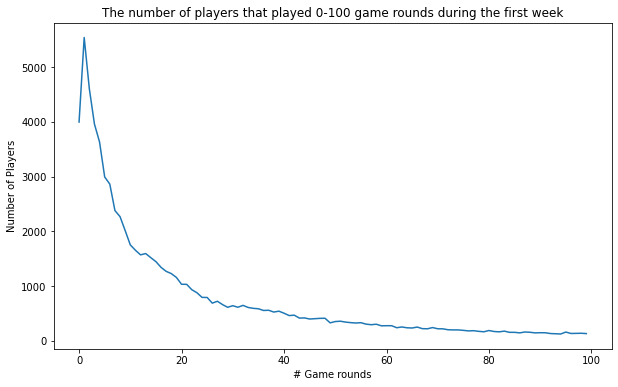

In [7]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
plot_df = data.groupby('sum_gamerounds')['userid'].count()
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

<AxesSubplot:ylabel='Density'>

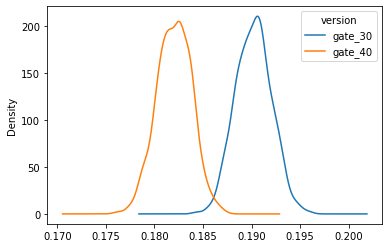

In [8]:
# Создание списка загрузочных средств для каждой AB-группы
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# График оценки плотности ядра для загрузочных дистрибутивов
boot_1d.plot(kind='density')

Выводы!
По этим графикам мы видим, что количество продолжающих игру после прохождения ворот выше для ворот установленных на 30 уровне.
Если посмотреть на первый график (сыгравших от 0 до 100 в первую неделю), то в общем можно сказать, что большая часть людей не доходит до ворот в принципе), и после 30 уровня идет плавное равномерное снижение вернувшихся к игре игроков, но в эти данные входят обе группы

Но уже по второму графику видно, что количество продолжающих играть после ворот на 30 уровне значимо выше - это значит, что переносить ворота на 40 уровень - плохая идея

In [9]:
## подтверждение гипотезы тестами 
# используем дисперсионный анализ, так как выборки не связаны


gate_30 = data.loc[data['version'] == 'gate_30']
gate_40 = data.loc[data['version'] == 'gate_40']

F, p = stats.f_oneway(gate_30["sum_gamerounds"], gate_40["sum_gamerounds"])

alpha = 0.05   # Уровень значимости
print('Statistics=%.3f, p=%.3f' % (F, p))

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.794, p=0.373
Same distribution (fail to reject H0)


In [10]:
# выборки две, можем применить t-критерий Стьюдента и проверить наше предположение
t, p_value = stats.ttest_ind(a=gate_30["sum_gamerounds"], b=gate_40["sum_gamerounds"], equal_var=False)
t, p_value

(0.8854374331270672, 0.37592438409326223)

По результатам теста видно, что статистически значимой разницы между выборками нет, но учитывая, что значение t-параметра положительно, можем сказать, что есть некоторое положительное отклонение в сторону выборки gate_30 и даже при таком минимальном различии перенос ворот с 30 уровня не будет иметь положительного результата.

## Покемоны и AB-тестирование
(реальный кейс собеседования на позицию Аналитика).

Описание задачи
banner

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

pid: Numeric - ID покемона
HP: Numeric - Очки здоровья
Attack: Numeric - Сила обычной атаки
Defense: Numeric - Сила обычной защиты
Sp. Atk: Numeric - Сила специальной атаки
Sp. Def: Numeric - Сила специальной защиты
Speed: Numeric - Скорость движений
Legendary: Boolean - «True», если покемон редкий
Class 1: Categorical - Класс покемона
Class 2: Categorical - Класс покемона

In [3]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## Задание № 1 (Обязательно):
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [5]:
import seaborn as sns
attack_grass_pokemon = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') |
                        (pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass')]['Attack']

attack_rock_pokemon = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') |
                        (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock')]['Attack']

In [6]:
from scipy import stats
stats.ttest_ind(attack_grass_pokemon, attack_rock_pokemon)

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

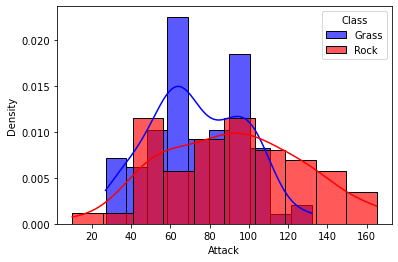

In [7]:
sns.histplot(data=attack_grass_pokemon, label='Grass', color='blue', alpha=0.65, bins=10, kde=True, stat='density')
sns.histplot(data=attack_rock_pokemon, label='Rock', color='red', alpha=0.65, bins=10, kde=True, stat='density')
plt.legend(title='Class')

p-value < $\alpha$ говорит нам о существенных различиях между атакой классов "Grass" и "Rock"

Знак статистики можно интерпритировать как средняя атака класса "Rock" больше класса "Grass".

## Задание № 2 (Обязательно):
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

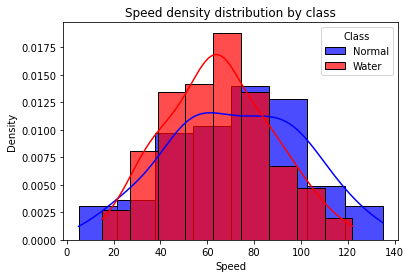

In [8]:
speed_water_pokemon = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') |
                        (pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water')]['Speed']

speed_normal_pokemon = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') |
                        (pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal')]['Speed']

import matplotlib.pyplot as plt
sns.histplot(data=speed_normal_pokemon, label='Normal', stat='density', color='b', alpha=0.7, kde=True)
sns.histplot(data=speed_water_pokemon, label='Water', stat='density', color='r', alpha=0.7, kde=True)
# plt.legend(['Water_speed', 'Normal_speed attack'])
plt.legend(title='Class')
plt.xlabel('Speed')
plt.title('Speed density distribution by class');

In [9]:
stats.ttest_ind(speed_water_pokemon, speed_normal_pokemon)

Ttest_indResult(statistic=-2.150913330007121, pvalue=0.03255353551391033)

## Задание № 3:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

## Задание № 4:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [10]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [11]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [12]:
stats.ttest_1samp(pokemon['Speed'], treathed['Speed'].mean())

Ttest_1sampResult(statistic=-74.67324937314746, pvalue=0.0)

In [13]:
stats.mannwhitneyu(pokemon['Speed'], treathed['Speed'])

MannwhitneyuResult(statistic=27.5, pvalue=0.0003434406962426653)

In [14]:
stats.ttest_ind(pokemon['Speed'], treathed['Speed'])

Ttest_indResult(statistic=-5.2763372799195425, pvalue=1.697269585494424e-07)

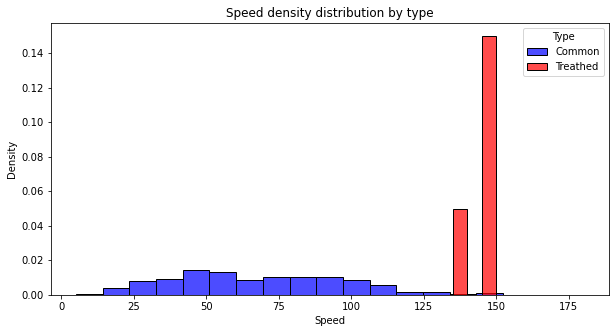

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=pokemon['Speed'], label='Common', stat='density', color='b', alpha=0.7)
sns.histplot(data=treathed['Speed'], label='Treathed', stat='density', color='r', alpha=0.7)
plt.legend(title='Type')
plt.xlabel('Speed')
plt.title('Speed density distribution by type');

Можем сделать вывод, что средняя скорость у покемонов, которые принимали сыворотку значительно выше

## Задание № 5:
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [16]:
gblegend = pokemon[['HP', 'Attack', 'Defense', 'Legendary']].groupby('Legendary') 
m = gblegend.sum() / gblegend.count()
m.T

Legendary,False,True
HP,67.182313,92.738462
Attack,75.669388,116.676923
Defense,71.559184,99.661538


In [17]:
pokemon_ = pokemon.copy().drop(columns=['Name', 'Class 1', 'Class 2', 'pid'])

In [18]:
pokemon_['Sum_Val'] = pokemon_['HP'] + pokemon_['Attack'] + pokemon_['Defense']
pokemon_['Product_Val'] = pokemon_['HP'] * pokemon_['Attack'] * pokemon_['Defense']

legend_pokemon = pokemon_[pokemon_['Legendary'] == True]
print(len(legend_pokemon))

65


In [19]:
common_pokemon = pokemon_[pokemon_['Legendary'] == False]
print(len(common_pokemon))

735


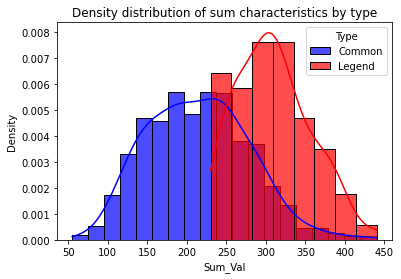

In [20]:
sns.histplot(data=common_pokemon['Sum_Val'], stat='density', color='b', alpha=0.7, kde=True, label='Common')
sns.histplot(data=legend_pokemon['Sum_Val'], stat='density', color='r', alpha=0.7, kde=True, label='Legend')
plt.title('Density distribution of sum characteristics by type')
plt.legend(title='Type')

In [21]:
stats.ttest_ind(common_pokemon['Sum_Val'], legend_pokemon['Sum_Val'])

Ttest_indResult(statistic=-11.591852366462316, pvalue=7.970942205722087e-29)

Сумма характеристик значимо различается, сумма характеристик легендарных покемонов выше, чем у обычных.

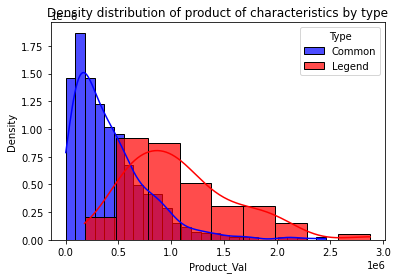

In [22]:
sns.histplot(data=common_pokemon['Product_Val'], stat='density', color='b', alpha=0.7, kde=True, label='Common')
sns.histplot(data=legend_pokemon['Product_Val'], stat='density', color='r', alpha=0.7, kde=True, label='Legend')
plt.title('Density distribution of product of characteristics by type')
plt.legend(title='Type')

In [23]:
stats.mannwhitneyu(common_pokemon['Product_Val'], legend_pokemon['Product_Val'])

MannwhitneyuResult(statistic=5741.5, pvalue=1.4775262883780305e-24)

Произведение характеристик значимо различается. Произведение характеристик легендарных покемонов в среднем выше, чем у обычных.

## Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [4]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [24]:
x = {}
for pok_class in best_defence_class:
    x[pok_class] = pokemon[(pokemon['Class 1'] == pok_class) &
                           ~(pokemon['Class 2'].isin(best_defence_class)) |
                           ~(pokemon['Class 1'].isin(best_defence_class)) &
                           (pokemon['Class 2'] == pok_class)]['Defense']

In [25]:
stats.f_oneway(x['Rock'], x['Ground'], x['Steel'], x['Ice'])

F_onewayResult(statistic=8.820416931465497, pvalue=1.885892116821956e-05)

Данные группы статистически значимо различаются по уровню защиты

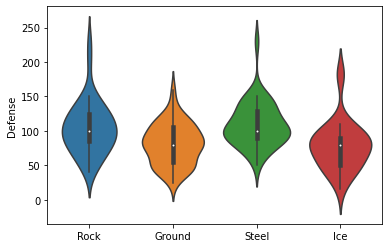

In [26]:
ax = sns.violinplot(data=[x['Rock'], x['Ground'], x['Steel'], x['Ice']])
ax.set_xticklabels(best_defence_class)
ax.set_ylabel('Defense');